# 📈 Optimizing a Portfolio: Google, Amazon, Microsoft and Apple Stocks

In [35]:
#pandas and NumPy imports
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#Extra:
import random

### Question 1: Loading and Cleaning Data

In [36]:
#Loading and inspecting the data
#Data set as index and properly parsed

stocks = pd.read_csv("stocks_unclean.csv", parse_dates=["date"], index_col="date", dayfirst=True)
stocks.head(10)

,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN
2021-05-07,open_AMZN,3.319090e+03
2020-03-10,open_AMZN,1.870880e+03
2020-03-09,volume_AAPL,2.867448e+08
2021-10-01,open_MSFT,2.821200e+02


**Understanding the data**:

The data provides each of the following values for 4 stocks (**AMZN, AAPL, MSFT & GOOG**):
- The *Open* and *Close* columns indicate the opening and closing price of the stocks on a particular day.
- The *High* and *Low* columns provide the highest and the lowest price for the stock on a particular day, respectively.
- The *Volume* column tells us the total volume of stocks traded on a particular day.

In [37]:
#Rearranging the data as a pandas Dataframe: One column per stock and concept
stocks[['concept','company']] = stocks['variable'].str.split('_',expand=True)
stocks.drop(columns=['variable'])

,value,concept,company
date,,,
2020-07-14,9.725500e+01,high,AAPL
2021-10-22,3.139100e+06,volume,AMZN
2021-06-04,2.528110e+07,volume,MSFT
2021-06-28,2.242800e+06,volume,AMZN
2021-11-23,NaN,low,GOOG
...,...,...,...
2020-07-17,3.163530e+07,volume,MSFT
2020-01-27,7.622000e+01,low,AAPL
2021-05-11,2.322000e+03,high,GOOG


In [38]:
#Inspect stocks column
stocks.company.unique()

array(['AAPL', 'AMZN', 'MSFT', 'GOOG', 'APL', 'GOG', nan, 'MST', 'AMZ'],
      dtype=object)

In [39]:
#By inspecting the data, there are a few misspelled stock names and a nan value

#Dealing with misspelled stock names
stocks["company"]= stocks["company"].replace(["GOG", "APL", "AMZ", "MST"], ["GOOG", "AAPL", "AMZN", "MSFT"])

stocks = stocks.dropna(subset=['company']) #To drop nan stock

In [40]:
#stocks.company.unique() #Looks good!

In [41]:
#Pivot table to obtain: Open, High, Low, Close, Volume per stock

stocks = stocks.pivot_table(index = 'date', columns = ['company','concept'], values = 'value')

#Sorting values by index date
stocks = stocks.sort_values(by="date")
stocks.head()

company          AAPL                                                \
concept         close       high        low       open       volume   
date                                                                  
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000.0   

company            AMZN                                               \
concept           close         high          low    open     volume   
date                                                                   
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500.0   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000.0   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400.0   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800.0   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900.0   

company            GOOG                                                    \
concept           close         high          low         open     volume   
date                                                                        
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800.0   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600.0   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400.0   
2020-01-06  1394.209961  1396.500000          NaN  1350.000000  1732300.0   
2020-01-07  1393.339966  1402.989990  1390.380005  1397.939941  1502700.0   

company           MSFT                                                  
concept          close        high         low        open      volume  
date                                                                    
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400.0  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100.0  
2020-01-03  158.619995  159.949997         NaN  158.320007  21116200.0  
2020-01-06  159.029999  159.100006  156.509995  157.080002  20813700.0  
2020-01-07  157.580002  159.669998  157.320007  159.320007  21634100.0

In [42]:
stocks.isnull().sum() #To check missing values

company  concept
AAPL     close       7
         high        8
         low         8
         open        8
         volume     13
AMZN     close       4
         high        6
         low         4
         open        3
         volume      2
GOOG     close       7
         high        2
         low         2
         open        2
         volume      7
MSFT     close       2
         high        2
         low         3
         open        4
         volume      6
dtype: int64

##### Null Values - Explanation:
* *Close* refers to the closing price so it makes sense for Close NaN values to be replaced with the average of the high and low of the same trading session. 
* *Open* refers to the opening price so it makes sense for Open NaN values to be replaced with the average of high and low of the same trading session. 
* *High* refers to the highest price of that period.It makes sense for high to be replaced with the max value occuring in that date. Since the data only includes open and close values, the maximum of both will be taken to replace NaN.
* *Low* refers to the lowest price of that period. It makes sense for low to be replaces with the min value occuring in that date. Again, the data includes open and close values only - so that minimum of both will be taken to replace NaN.
* *Volume* refers to the # of shares traded in the stock over a period of time (day). Used `interpolate` to estimate the null values

In [43]:
stock_list = list(stocks.columns.levels[0])

for stock in stock_list:
    #Close data: average of high and low
    stocks.loc[:, (stock,  'close')].fillna(
    value = (stocks.loc[:, (stock,  'high')] +stocks.loc[:, (stock,  'low')])/2, inplace=True)
    
    #Open data: average of high and low
    stocks.loc[:, (stock,  'open')].fillna(
    value = (stocks.loc[:, (stock,  'high')] +stocks.loc[:, (stock,  'low')])/2, inplace=True)
    
    #High data: Maximum between open and close
    stocks.loc[:, (stock, 'high')].fillna(
    value = stocks.loc[:, (stock)].drop(axis=1, columns = ['volume', 'low']).max(axis=1),inplace=True)
    
    #Low: Minimum between open and close
    stocks.loc[:, (stock, 'low')].fillna(
    value = stocks.loc[:, (stock)].drop(axis=1, columns = ['volume', 'high']).min(axis=1),inplace=True)    
    
#Volume
stocks.interpolate(method='linear', inplace=True)

#Resampling daily because 365 rows != 1 year
stocks = stocks.resample("D").fillna(method="ffill")

In [44]:
#df.isnull().sum() 
#Looks good!

In [45]:
# Resulting dataframe `dtypes`
stocks.dtypes

company  concept
AAPL     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
AMZN     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
GOOG     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
MSFT     close      float64
         high       float64
         low        float64
         open       float64
         volume     float64
dtype: object

### Question 2: Visualizations

##### 2.1.) 2x2 grid of plots: "Open" and "Close" for each stock.

2.1.a) Using for loops (less code but a little slower)

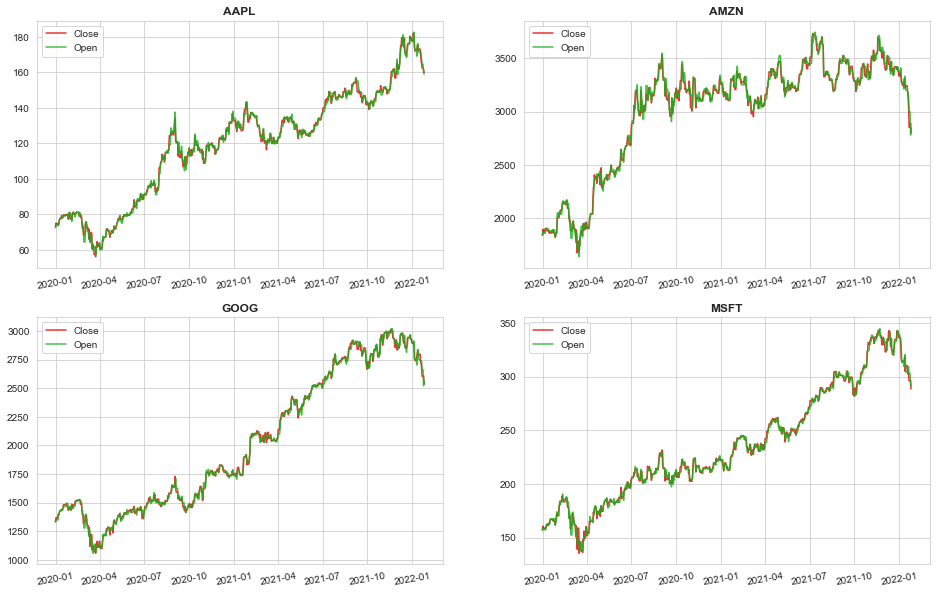

In [46]:
plt.figure(figsize = (16,10))
companies = ['AAPL', 'AMZN', 'GOOG', 'MSFT']

for x, company in zip(range(1,5),companies):
    plt.subplot(2,2,x)
    plt.plot(stocks.loc[:,(company, 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
    plt.plot(stocks.loc[:,(company, 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
    plt.title(company, loc ='center', fontweight="bold")
    plt.xticks(rotation=10)
    plt.legend()

2.1.a) No for loops (more code but faster)

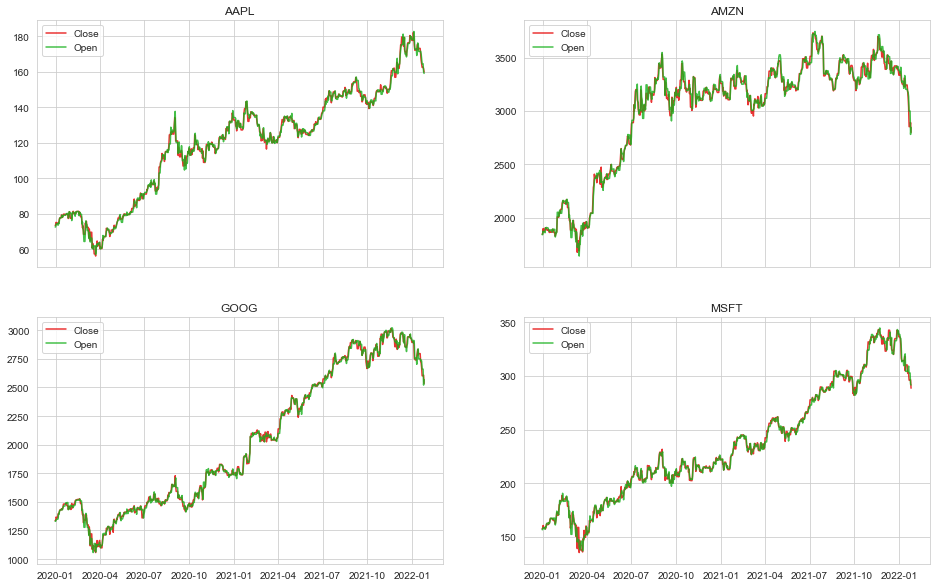

In [47]:
fig, ((ax_AAPL, ax_AMZN), (ax_GOOG, ax_MSFT)) = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=True)

ax_AAPL.plot(stocks.loc[:,("AAPL", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_AAPL.plot(stocks.loc[:,("AAPL", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_AAPL.legend()
ax_AAPL.title.set_text("AAPL")

ax_AMZN.plot(stocks.loc[:,("AMZN", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_AMZN.plot(stocks.loc[:,("AMZN", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_AMZN.legend()
ax_AMZN.title.set_text("AMZN")

ax_GOOG.plot(stocks.loc[:,("GOOG", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_GOOG.plot(stocks.loc[:,("GOOG", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_GOOG.legend()
ax_GOOG.title.set_text("GOOG")

ax_MSFT.plot(stocks.loc[:,("MSFT", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_MSFT.plot(stocks.loc[:,("MSFT", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_MSFT.legend()
ax_MSFT.title.set_text("MSFT")


##### 2.2.) Same 2x2 grid but resampling with the weekly average of "Open" and "Close".

2.2.a) Only using for loops (less code, but a little slower)

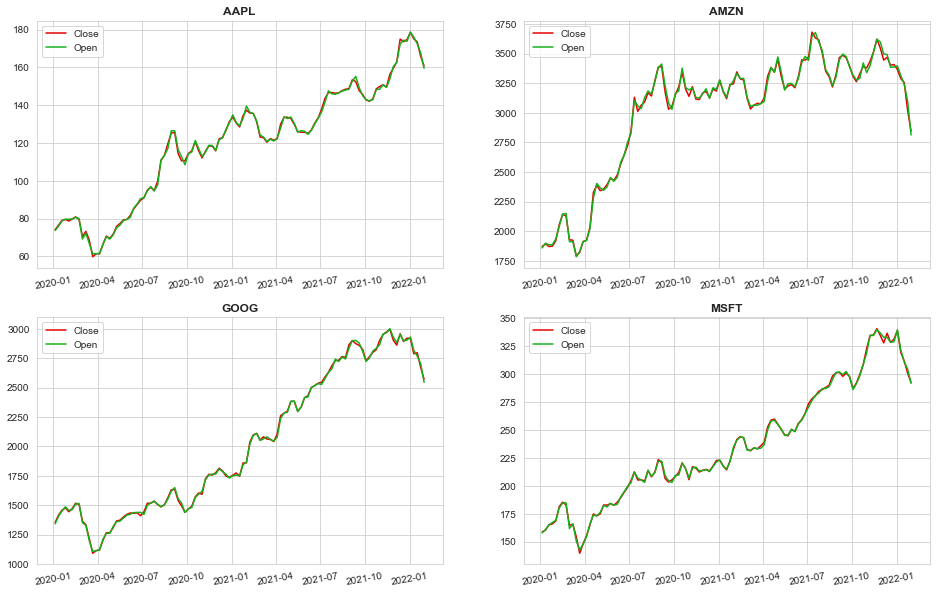

In [48]:
plt.figure(figsize = (16,10))
weekly_average = stocks.resample("W").mean()

for x, company in zip(range(1,5),companies):
    plt.subplot(2,2,x)
    plt.plot(weekly_average.loc[:,(company, 'close')], label = 'Close', color = '#E50000')
    plt.plot(weekly_average.loc[:,(company, 'open')], label = 'Open', color = '#15B01A')
    plt.title(company , fontweight= "bold")
    plt.xticks(rotation=10)
    plt.legend()

2.2.a) No for loops (more code but faster!)

In [49]:
weekly_average = stocks.resample("W").mean()

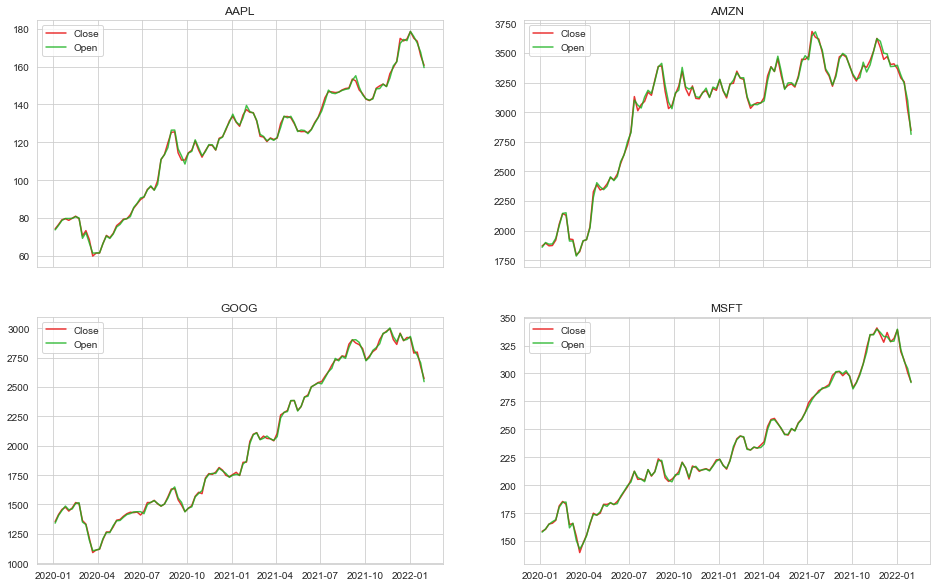

In [50]:
fig, ((ax_AAPL, ax_AMZN), (ax_GOOG, ax_MSFT)) = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=True)

ax_AAPL.plot(weekly_average.loc[:,("AAPL", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_AAPL.plot(weekly_average.loc[:,("AAPL", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_AAPL.legend()
ax_AAPL.title.set_text("AAPL")

ax_AMZN.plot(weekly_average.loc[:,("AMZN", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_AMZN.plot(weekly_average.loc[:,("AMZN", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_AMZN.legend()
ax_AMZN.title.set_text("AMZN")

ax_GOOG.plot(weekly_average.loc[:,("GOOG", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_GOOG.plot(weekly_average.loc[:,("GOOG", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_GOOG.legend()
ax_GOOG.title.set_text("GOOG")

ax_MSFT.plot(weekly_average.loc[:,("MSFT", 'close')], label = 'Close', color = '#E50000', alpha = 0.8)
ax_MSFT.plot(weekly_average.loc[:,("MSFT", 'open')], label = 'Open', color = '#15B01A', alpha=0.8)
ax_MSFT.legend()
ax_MSFT.title.set_text("MSFT")

##### 2.3.) Meaningful visualizations of choice: Market Capitalization for each company.

Market Capitalization is the value of a company that is traded on the stock market, calculated by multiplying the total number of shares ("Volume") by the present share price ("Close").

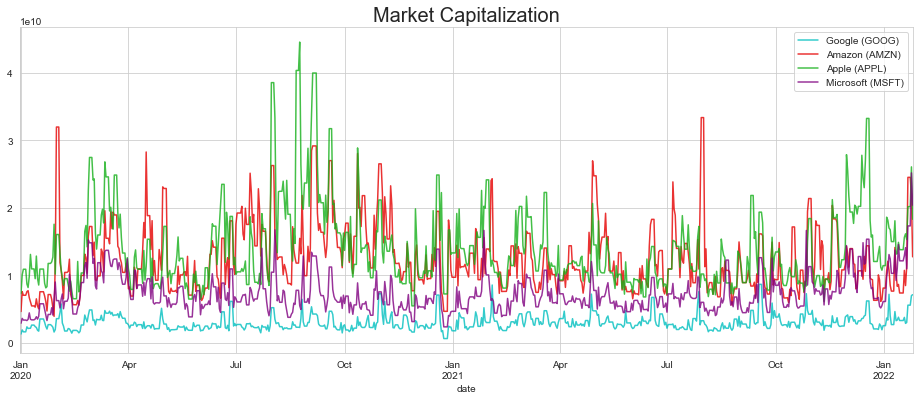

In [51]:
GOOG_cap = stocks.loc[:,("GOOG", "open")]*stocks.loc[:,("GOOG", "volume")]
AMZN_cap = stocks.loc[:,("AMZN", "open")]*stocks.loc[:,("AMZN", "volume")]
AAPL_cap = stocks.loc[:,("AAPL", "open")]*stocks.loc[:,("AAPL", "volume")]
MSFT_cap = stocks.loc[:,("MSFT", "open")]*stocks.loc[:,("MSFT", "volume")]


#Plotting graph
fig, ax = plt.subplots(figsize=(16,6))

ax.set_title("Market Capitalization", fontsize= 20)
GOOG_cap.plot(ax=ax, color= 'c', linestyle = '-',  alpha=0.8, label="Google (GOOG)")
AMZN_cap.plot(ax=ax, color="#E50000", linestyle = '-',  alpha=0.8, label="Amazon (AMZN)")
AAPL_cap.plot(ax=ax, color="#15B01A", linestyle = '-' , alpha = 0.8, label="Apple (APPL)")
MSFT_cap.plot(ax=ax, color="purple", linestyle = '-', alpha=0.8, label="Microsoft (MSFT)")
ax.legend()



### Question 3: Return on Investment

In [52]:
def roi(lookback,stock,data):
    ROI = 100* (data[stock, "close"]/ data[stock, "close"].shift(lookback) -1)
    return ROI

In [53]:
roi(365, "GOOG", stocks)

date
2019-12-31          NaN
2020-01-01          NaN
2020-01-02          NaN
2020-01-03          NaN
2020-01-04          NaN
                ...    
2022-01-21    37.572510
2022-01-22    36.863313
2022-01-23    36.863313
2022-01-24    37.157880
2022-01-25    33.447927
Freq: D, Name: (GOOG, close), Length: 757, dtype: float64

### Question 4: Visualizations of ROI after 365, 180 and 90 days

In [54]:
lookbacks = ['365', '180', '90']
for company in companies:
    for lookback in lookbacks:
        for row in stocks[stock]:
            stocks[company, str("ROI_"+str(lookback))] = roi(int(lookback),company, stocks)

In [55]:
stocks.reset_index().tail()

company       date        AAPL                                      \
concept                  close        high         low        open   
752     2022-01-21  162.410004  166.330002  162.300003  164.419998   
753     2022-01-22  162.410004  166.330002  162.300003  164.419998   
754     2022-01-23  162.410004  166.330002  162.300003  164.419998   
755     2022-01-24  161.619995  162.300003  154.699997  160.020004   
756     2022-01-25  159.779999  162.759995  157.020004  158.979996   

company                      AMZN                                         ...  \
concept       volume        close         high          low         open  ...   
752      122501300.0  2852.860107  3018.000000  2841.409912  2999.000000  ...   
753      122501300.0  2852.860107  3018.000000  2841.409912  2999.000000  ...   
754      122501300.0  2852.860107  3018.000000  2841.409912  2999.000000  ...   
755      162706700.0  2890.879883  2898.899902  2707.040039  2780.000000  ...   
756      114972000.0  2799.719971  2872.000000  2762.899902  2844.850098  ...   

company      AAPL       AMZN                             GOOG            \
concept    ROI_90    ROI_365    ROI_180     ROI_90    ROI_365   ROI_180   
752      9.227252 -13.732424 -21.981377 -14.471075  37.572510 -5.604573   
753      9.227252 -13.345662 -22.891923 -14.471075  36.863313 -6.840578   
754      9.263996 -13.345662 -21.330574 -14.080057  36.863313 -4.901070   
755      8.237334 -12.190828 -20.355072 -14.371449  37.157880 -4.406387   
756      7.342957 -15.005465 -22.228271 -17.473007  33.447927 -7.181023   

company                  MSFT                       
concept     ROI_90    ROI_365   ROI_180     ROI_90  
752      -6.155452  31.586432  2.195597  -4.246993  
753      -6.155452  31.015713  2.414811  -4.246993  
754      -6.255535  31.015713  3.311925  -3.926916  
755      -6.658457  31.166187  3.546221  -4.430683  
756     -13.448296  25.687270  0.694586 -10.731201  

[5 rows x 33 columns]

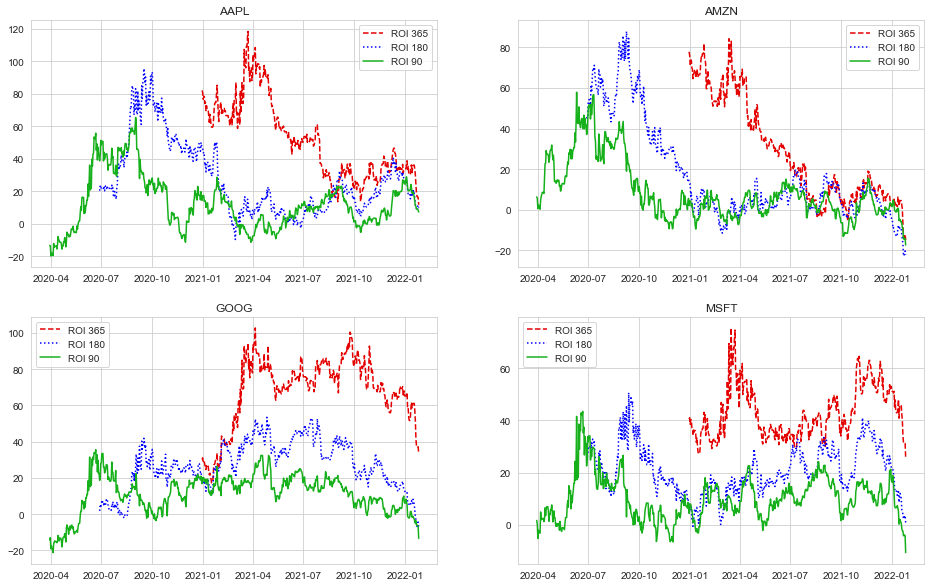

In [56]:
fig, ((ax_AAPL, ax_AMZN), (ax_GOOG, ax_MSFT)) = plt.subplots(nrows=2, ncols=2, figsize=(16,10))

ax_AAPL.plot(stocks.loc[:,("AAPL", 'ROI_365')], label = 'ROI 365', color = '#E50000', linestyle= '--')
ax_AAPL.plot(stocks.loc[:,("AAPL", 'ROI_180')], label = 'ROI 180', color = 'blue', linestyle= ':')
ax_AAPL.plot(stocks.loc[:,("AAPL", 'ROI_90')], label = 'ROI 90', color = '#15B01A', linestyle= '-')
ax_AAPL.legend()
ax_AAPL.title.set_text("AAPL")

ax_AMZN.plot(stocks.loc[:,("AMZN", 'ROI_365')], label = 'ROI 365', color = '#E50000', linestyle= '--')
ax_AMZN.plot(stocks.loc[:,("AMZN", 'ROI_180')], label = 'ROI 180', color = 'blue', linestyle= ':')
ax_AMZN.plot(stocks.loc[:,("AMZN", 'ROI_90')], label = 'ROI 90', color = '#15B01A', linestyle= '-')
ax_AMZN.legend()
ax_AMZN.title.set_text("AMZN")

ax_GOOG.plot(stocks.loc[:,("GOOG", 'ROI_365')], label = 'ROI 365', color = '#E50000', linestyle= '--')
ax_GOOG.plot(stocks.loc[:,("GOOG", 'ROI_180')], label = 'ROI 180', color = 'blue', linestyle= ':')
ax_GOOG.plot(stocks.loc[:,("GOOG", 'ROI_90')], label = 'ROI 90', color = '#15B01A', linestyle= '-')
ax_GOOG.legend()
ax_GOOG.title.set_text("GOOG")

ax_MSFT.plot(stocks.loc[:,("MSFT", 'ROI_365')], label = 'ROI 365', color = '#E50000', linestyle= '--')
ax_MSFT.plot(stocks.loc[:,("MSFT", 'ROI_180')], label = 'ROI 180', color = 'blue', linestyle= ':')
ax_MSFT.plot(stocks.loc[:,("MSFT", 'ROI_90')], label = 'ROI 90', color = '#15B01A', linestyle= '-')
ax_MSFT.legend()
ax_MSFT.title.set_text("MSFT")

### Question 5: Best average ROI

In [57]:
stocks.loc[:, ("AAPL", "price_365")] = (stocks.loc[:, ("AAPL", "ROI_365")])* (stocks.loc[:, ("AAPL", "close")].shift(365))*0.01
stocks.loc[:, ("GOOG", "price_365")] = (stocks.loc[:, ("GOOG", "ROI_365")])* (stocks.loc[:, ("GOOG", "close")].shift(365))*0.01
stocks.loc[:, ("AMZN", "price_365")] = (stocks.loc[:, ("AMZN", "ROI_365")])* (stocks.loc[:, ("AMZN", "close")].shift(365))*0.01
stocks.loc[:, ("MSFT", "price_365")] = (stocks.loc[:, ("MSFT", "ROI_365")])* (stocks.loc[:, ("MSFT", "close")].shift(365))*0.01

In [58]:
def roi_portfolio(portfolio, data):
    
    AAPL_ROI = (data.loc[:, ("AAPL", "price_365")].mean()*portfolio[0]/100)
    GOOG_ROI = (data.loc[:, ("GOOG", "price_365")].mean()*portfolio[1]/100)
    MSFT_ROI = (data.loc[:, ("MSFT", "price_365")].mean()*portfolio[2]/100)
    AMZN_ROI = (data.loc[:, ("AMZN", "price_365")].mean()*portfolio[3]/100)
    
    total_roi = round((AAPL_ROI+GOOG_ROI+MSFT_ROI+AMZN_ROI),2)
    print ("With a lookback of 365 days: \n",
           "Apple has an ROI of ", round (AAPL_ROI,2), "$ at", portfolio[0], "% investment", "\n",
           "Google has an ROI of ", round (GOOG_ROI,2), "$ at", portfolio[1], "% investment", "\n",
           "Microsoft has an ROI of ", round (MSFT_ROI,2), "$ at", portfolio[2], "% investment", "\n",
           "Amazon has an ROI of ", round (AMZN_ROI,2), "$ at", portfolio[3], "% investment", "\n",
           "So, the AVERAGE ROI for this portfolio is:", total_roi, "$")
    
    return total_roi

#### Portfolio 1

In [59]:
portfolio1 = [40, 30, 20, 10]
portfolio1_ROI = roi_portfolio(portfolio1, stocks)
portfolio1_ROI

With a lookback of 365 days: 
 Apple has an ROI of  18.15 $ at 40 % investment 
 Google has an ROI of  304.73 $ at 30 % investment 
 Microsoft has an ROI of  16.63 $ at 20 % investment 
 Amazon has an ROI of  62.95 $ at 10 % investment 
 So, the AVERAGE ROI for this portfolio is: 402.47 $


402.47

#### Portfolio 2

In [60]:
portfolio2 = [30, 20, 10, 40]
portfolio2_ROI = roi_portfolio(portfolio2, stocks)
portfolio2_ROI

With a lookback of 365 days: 
 Apple has an ROI of  13.61 $ at 30 % investment 
 Google has an ROI of  203.15 $ at 20 % investment 
 Microsoft has an ROI of  8.32 $ at 10 % investment 
 Amazon has an ROI of  251.81 $ at 40 % investment 
 So, the AVERAGE ROI for this portfolio is: 476.89 $


476.89

#### Conclusion

In [61]:
if portfolio1_ROI < portfolio2_ROI:
    print("With a 365 lookback, Portfolio 2 has a better ROI than Portfolio 1 with a $", round(portfolio2_ROI - portfolio1_ROI, 2), "higher return on average.")
else:
    print ("With a 365 lookback, Portfolio 1 has a better ROI than Portfolio 2 with a $",round(portfolio2_ROI - portfolio1_ROI, 2), "higher return on average.")

With a 365 lookback, Portfolio 2 has a better ROI than Portfolio 1 with a $ 74.42 higher return on average.


### Question 6: Finding a better combination in the portfolio.

1. Created a random % combinations of portfolios (the maximum each should have is maximum 97 and minimum 1, so that they add up to 100). 
2. `ROI_365` function to once again calculate the total ROI (without text)
3. `best_portfolio` function to calculate the new ROI for new portfolios
4. Tried 10 different portfolios to check which perform better than the previous combination of portfolio 2.

In [62]:
def misc(portfolio_list):
    tot = sum(portfolio_list)
    while tot < 100 or tot > 100:
        portfolio_list[0] = random.randint(1,97)
        portfolio_list[1] = random.randint(1,97)
        portfolio_list[2] = random.randint(1,97)
        portfolio_list[3] = random.randint(1,97)
        tot = sum(portfolio_list)
    return portfolio_list 

In [63]:
def ROI_365(portfolio, portfolio_list):
    
    AAPL_ROI = (portfolio_list.loc[:, ("AAPL", "price_365")].mean()*portfolio[0]/100)
    GOOG_ROI = (portfolio_list.loc[:, ("GOOG", "price_365")].mean()*portfolio[1]/100)
    MSFT_ROI = (portfolio_list.loc[:, ("MSFT", "price_365")].mean()*portfolio[2]/100)
    AMZN_ROI = (portfolio_list.loc[:, ("AMZN", "price_365")].mean()*portfolio[3]/100)
    TOTAL_ROI = AAPL_ROI + GOOG_ROI + MSFT_ROI + AMZN_ROI
    
    return round(TOTAL_ROI,2)

In [64]:
def best_portfolio(portfolio, portfolio_roi):
    
    new_portfolio = [1,1,1,1]
    new_portfolio = misc(new_portfolio)
    new_portfolio_roi = ROI_365(new_portfolio, stocks)
    if new_portfolio_roi < portfolio_roi:
        print("This portfolio" , new_portfolio, "is $", round((portfolio_roi - new_portfolio_roi),2), "worse than Portfolio 2")
    else: 
        print("This portfolio" , new_portfolio, "is $",  round((new_portfolio_roi - portfolio_roi),2), "BETTER than Portfolio 2")
    return new_portfolio, round(new_portfolio_roi,2)

Finding the best portfolio...

In [65]:
portfolio3, portfolio3_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio4, portfolio4_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio5, portfolio5_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio6, portfolio6_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio7, portfolio7_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio8, portfolio8_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio9, portfolio9_ROI = best_portfolio(portfolio2, portfolio2_ROI)
portfolio10, portfolio10_ROI = best_portfolio(portfolio2, portfolio2_ROI)

This portfolio [72, 7, 20, 1] is $ 350.19 worse than Portfolio 2
This portfolio [40, 9, 27, 24] is $ 193.78 worse than Portfolio 2
This portfolio [2, 13, 21, 64] is $ 76.43 BETTER than Portfolio 2
This portfolio [4, 14, 29, 53] is $ 24.9 BETTER than Portfolio 2
This portfolio [11, 16, 10, 63] is $ 95.54 BETTER than Portfolio 2
This portfolio [22, 35, 15, 28] is $ 77.35 BETTER than Portfolio 2
This portfolio [3, 21, 48, 28] is $ 46.03 worse than Portfolio 2
This portfolio [38, 22, 32, 8] is $ 159.2 worse than Portfolio 2


In [66]:
portfolio1.append(portfolio1_ROI)
portfolio2.append(portfolio2_ROI)
portfolio3.append(portfolio3_ROI)
portfolio4.append(portfolio4_ROI)
portfolio5.append(portfolio5_ROI)
portfolio6.append(portfolio6_ROI)
portfolio7.append(portfolio7_ROI)
portfolio8.append(portfolio8_ROI)
portfolio9.append(portfolio9_ROI)
portfolio10.append(portfolio10_ROI)

In [67]:
weights = ["Apple %", "Google %", "Microsoft %", "Amazon %", "Average_ROI"]
portfolios = pd.DataFrame(list(zip(portfolio1, portfolio2, portfolio3, portfolio4, portfolio5, 
                                   portfolio6, portfolio7, portfolio8, portfolio9, portfolio10, weights)),
                          columns =["Portfolio 1", "Portfolio 2", "Portfolio 3", "Portfolio 4", "Portfolio 5",
                                    "Portfolio 6", "Portfolio 7", "Portfolio 8", "Portfolio 9", "Portfolio 10", "Portfolio"])

portfolios = portfolios.set_index("Portfolio")
portfolios = portfolios.T.sort_values(by="Average_ROI", ascending=False)

portfolios

Portfolio,Apple %,Google %,Microsoft %,Amazon %,Average_ROI
Portfolio 7,11.0,16.0,10.0,63.0,572.43
Portfolio 8,22.0,35.0,15.0,28.0,554.24
Portfolio 5,2.0,13.0,21.0,64.0,553.32
Portfolio 6,4.0,14.0,29.0,53.0,501.79
Portfolio 2,30.0,20.0,10.0,40.0,476.89
Portfolio 9,3.0,21.0,48.0,28.0,430.86
Portfolio 1,40.0,30.0,20.0,10.0,402.47
Portfolio 10,38.0,22.0,32.0,8.0,317.69
Portfolio 4,40.0,9.0,27.0,24.0,283.11
Portfolio 3,72.0,7.0,20.0,1.0,126.70


In [68]:
print ("The best portfolio is", portfolios.index[portfolios["Average_ROI"] == portfolios["Average_ROI"].max()].tolist()[0], 
       "and gives an average ROI of $", portfolios["Average_ROI"].max())

The best portfolio is Portfolio 7 and gives an average ROI of $ 572.43
